In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean

In [6]:
# Define the ticker symbol
tickerSymbol = 'USD'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2021-1-1', end='2024-5-5')
print(f'History: {len(history)} weeks')

History: 175 weeks


In [7]:

# Assuming 'df' is your DataFrame and it has a 'price' column
# Also assuming the DataFrame is sorted by date in ascending order
def calculate_days_to_target_increase(df, increase_percentage):
    target_days = []
    for index, row in df.iterrows():
        current_price = row.Open
        target_price = current_price * (1 + increase_percentage)
        future_prices = df.loc[index:, 'High']
        
        # Find the index of the first future price that meets or exceeds the target price
        target_day_index = future_prices[future_prices >= target_price].index.min()
        
        # Calculate the number of days to reach the target price
        if pd.notnull(target_day_index):
            days_to_target = round((target_day_index - index).days / 7) + 1
        else:
            days_to_target = None  # If the target price is never met
        
        target_days.append(days_to_target)
    
    return target_days

# Add a new column 'days_to_50_percent_increase' to the DataFrame
history['weeks_to_50p'] = calculate_days_to_target_increase(history, 0.50)

print(f'Median: {history.weeks_to_50p.median()} weeks')


Median: 23.0 weeks


Text(0.5, 1.0, 'USD')

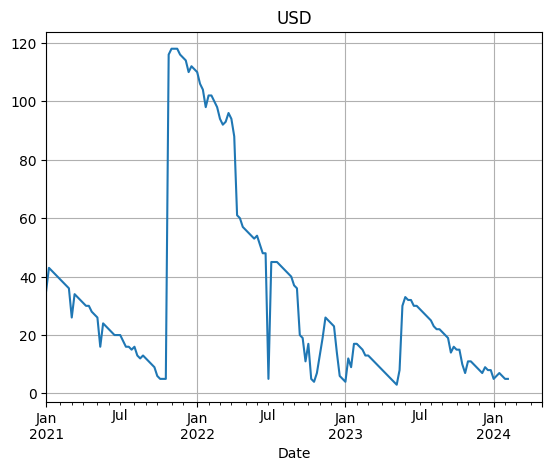

In [8]:
history.weeks_to_50p.plot()
plt.grid()
plt.title(tickerSymbol)